In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

df_2023 = pd.read_csv('../data/raw/2023-comptage-velo-donnees-compteurs.csv', sep=';')
df_2024 = pd.read_csv('../data/raw/2024-comptage-velo-donnees-compteurs.csv', sep=';')
df = pd.concat([df_2023, df_2024], axis=0)


In [2]:
df.shape

(1799534, 16)

In [3]:
df.head()

,Identifiant du compteur,Nom du compteur,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du site de comptage,Lien vers photo du site de comptage,Coordonnées géographiques,Identifiant technique compteur,ID Photos,test_lien_vers_photos_du_site_de_comptage_,id_photo_1,url_sites,type_dimage,mois_annee_comptage
0,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,4,2023-01-01T07:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01
1,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,14,2023-01-01T04:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01
2,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,10,2023-01-01T09:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01
3,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,25,2023-01-01T16:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01
4,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,14,2023-01-01T05:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01


In [4]:
df["Comptage horaire"].value_counts()

Comptage horaire
0       79107
1       47658
2       47176
3       43417
4       39276
        ...  
1268        1
2887        1
1277        1
1413        1
1089        1
Name: count, Length: 1349, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1799534 entries, 0 to 939343
Data columns (total 16 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Identifiant du compteur                     object 
 1   Nom du compteur                             object 
 2   Identifiant du site de comptage             float64
 3   Nom du site de comptage                     object 
 4   Comptage horaire                            int64  
 5   Date et heure de comptage                   object 
 6   Date d'installation du site de comptage     object 
 7   Lien vers photo du site de comptage         object 
 8   Coordonnées géographiques                   object 
 9   Identifiant technique compteur              object 
 10  ID Photos                                   object 
 11  test_lien_vers_photos_du_site_de_comptage_  object 
 12  id_photo_1                                  object 
 13  url_sites                        

In [6]:
# Convertir la colonne en datetime (avec gestion du fuseau horaire)
df["Date et heure de comptage"] = pd.to_datetime(df["Date et heure de comptage"], utc=True)

In [7]:
df.dtypes

Identifiant du compteur                                    object
Nom du compteur                                            object
Identifiant du site de comptage                           float64
Nom du site de comptage                                    object
Comptage horaire                                            int64
Date et heure de comptage                     datetime64[ns, UTC]
Date d'installation du site de comptage                    object
Lien vers photo du site de comptage                        object
Coordonnées géographiques                                  object
Identifiant technique compteur                             object
ID Photos                                                  object
test_lien_vers_photos_du_site_de_comptage_                 object
id_photo_1                                                 object
url_sites                                                  object
type_dimage                                                object
mois_annee

In [8]:
#Met les dates dans l'ordre croissant
df = df.sort_values(by="Date et heure de comptage")

In [9]:
#Crée 3 colonnes Année, Jour et Heure (Mois existe déjà) en mettant
#l'année à la 15eme colonne pour faire Année Mois Jour Heure dans le dataframe

df.insert(15, "Année", df["Date et heure de comptage"].dt.year)
df["Jour"] = df["Date et heure de comptage"].dt.date
df["Heure"] = df["Date et heure de comptage"].dt.hour

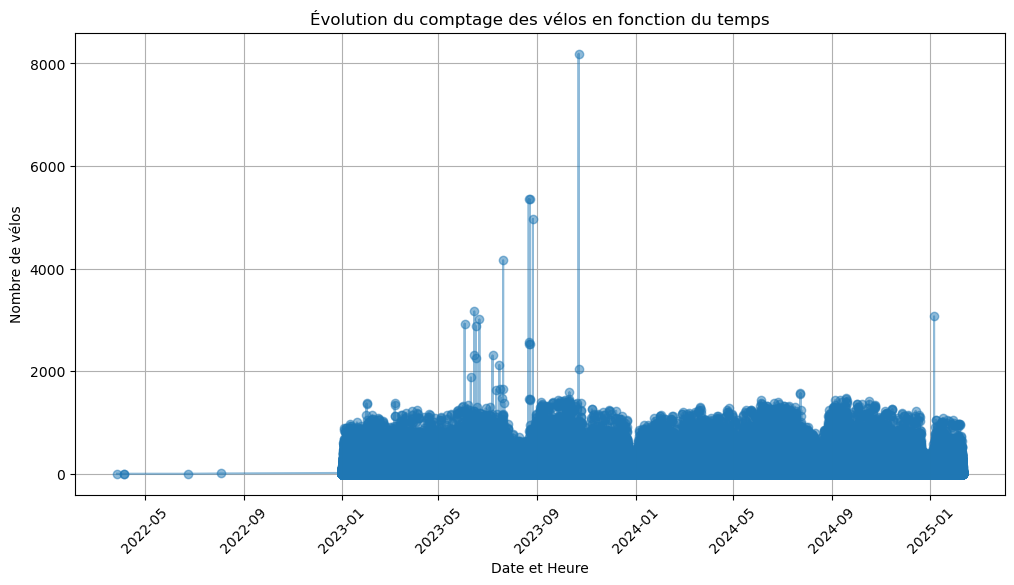

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date et heure de comptage"], df["Comptage horaire"], marker = "o", linestyle = "-", alpha = 0.5)
plt.xlabel("Date et Heure")
plt.ylabel("Nombre de vélos")
plt.title("Évolution du comptage des vélos en fonction du temps")
plt.xticks(rotation=45)
plt.grid()

# Afficher le graphique
plt.show()

In [11]:
comptage_annuel = df.groupby("Année")["Comptage horaire"].sum()
comptage_mensuel = df.groupby("mois_annee_comptage")["Comptage horaire"].sum()
comptage_quotidien = df.groupby("Jour")["Comptage horaire"].sum()
comptage_horaire = df.groupby("Heure")["Comptage horaire"].sum()

In [12]:
print(comptage_annuel)
print("Au total, toutes années confondues, on a relevé",(comptage_annuel).sum(), "cyclistes dans la capitale.")

Année
2022           5
2023    66075432
2024    64644553
2025     5781549
Name: Comptage horaire, dtype: int64
Au total, toutes années confondues, on a relevé 136501539 cyclistes dans la capitale.


In [13]:
print(comptage_mensuel)

mois_annee_comptage
2022-03          0
2022-04          0
2022-06          0
2022-08          5
2023-01    4352431
2023-02    4779610
2023-03    5542118
2023-04    5164835
2023-05    5757886
2023-06    7170532
2023-07    5706432
2023-08    4201543
2023-09    7194882
2023-10    6725868
2023-11    5118487
2023-12    4360808
2024-01    4286746
2024-02    4541407
2024-03    5480416
2024-04    5386934
2024-05    5760008
2024-06    6515408
2024-07    5807252
2024-08    4762143
2024-09    6459335
2024-10    6098886
2024-11    5268346
2024-12    4275708
2025-01    4402441
2025-02    1381072
Name: Comptage horaire, dtype: int64


In [14]:
print(comptage_quotidien)
print(''' 
On peut se rendre compte ici que l'année 2022 ne nous apporte pas vraiment d'éléments
significatifs à traiter, on pourra donc la supprimer de notre dataset.''')

Jour
2022-03-27         0
2022-04-05         0
2022-06-23         0
2022-08-03         5
2023-01-01     36393
               ...  
2025-02-05    184583
2025-02-06    188961
2025-02-07    159199
2025-02-08    127304
2025-02-09    101702
Name: Comptage horaire, Length: 775, dtype: int64
 
On peut se rendre compte ici que l'année 2022 ne nous apporte pas vraiment d'éléments
significatifs à traiter, on pourra donc la supprimer de notre dataset.


In [15]:
print(comptage_horaire)

Heure
0      1099498
1       696443
2       463055
3       529554
4       916249
5      2642734
6      8363810
7     11525309
8      7986427
9      5402268
10     6100203
11     6646042
12     6513418
13     6539055
14     7106192
15     9177308
16    12585155
17    13298115
18     9863743
19     5985958
20     4451364
21     3978230
22     2894831
23     1736578
Name: Comptage horaire, dtype: int64


In [16]:
# Pour suprimer les lignes se référant à l'année 2022 :
df = df.drop(df[df["Date et heure de comptage"].dt.year == 2022].index)

In [17]:
# Compter le nombre de NaN/NaT dans chaque colonne
nan_counts = df.isna().sum()

print(nan_counts)

Identifiant du compteur                       61605
Nom du compteur                                   0
Identifiant du site de comptage               61605
Nom du site de comptage                       61605
Comptage horaire                                  0
Date et heure de comptage                         0
Date d'installation du site de comptage       61605
Lien vers photo du site de comptage           80097
Coordonnées géographiques                     61605
Identifiant technique compteur                84316
ID Photos                                     80097
test_lien_vers_photos_du_site_de_comptage_    80097
id_photo_1                                    80097
url_sites                                     61605
type_dimage                                   80097
Année                                             0
mois_annee_comptage                               0
Jour                                              0
Heure                                             0
dtype: int64

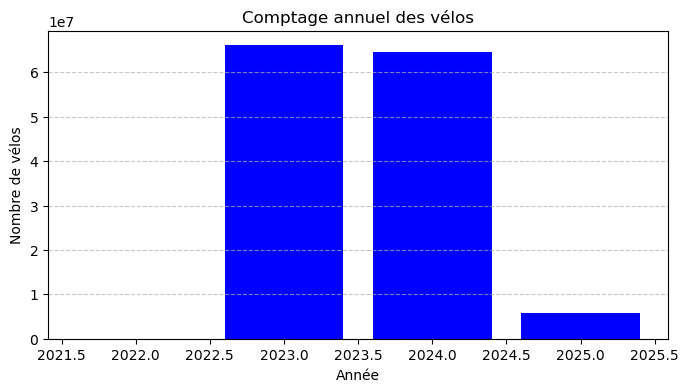


Nous constatons ici que l'année 2024 a rassemblé au total environ 65 millions de cyclistes.


In [18]:
#Graphique représentant l'évolution du nombre de cycliste dans la capitale suivant l'année.

plt.figure(figsize=(8, 4))
plt.bar(comptage_annuel.index, comptage_annuel.values, color = "blue")
plt.xlabel("Année")
plt.ylabel("Nombre de vélos")
plt.title("Comptage annuel des vélos")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

print('''
Nous constatons ici que l'année 2024 a rassemblé au total environ 65 millions de cyclistes.''')

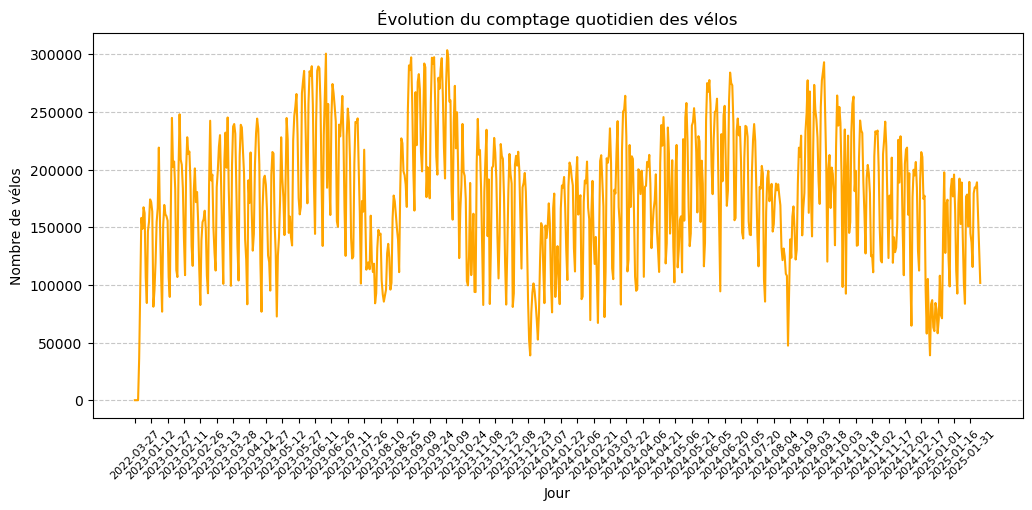

 
On peut observer ici certaines tendances notamment des diminutions significatives
au mois d'Août et Décembre qui correspondent respectivement à une saison chaude
pendant les vacances scolaires (voyages, etc.) et à Noël (saison plus froide et familiale).
Il semble également y avoir une reprise au mois de Septembre montrant la reprise du travail 
et la rentrée pour les étudiants.


In [19]:
plt.figure(figsize=(12, 5))
plt.plot(comptage_quotidien.index.astype(str), comptage_quotidien.values, linestyle = "-", color = "orange")

plt.xlabel("Jour")
plt.ylabel("Nombre de vélos")
plt.title("Évolution du comptage quotidien des vélos")
plt.xticks(ticks = range(0, len(comptage_quotidien), 15), labels = comptage_quotidien.index[::15].astype(str), rotation = 45, fontsize = 8)

plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show() 

print(''' 
On peut observer ici certaines tendances notamment des diminutions significatives
au mois d'Août et Décembre qui correspondent respectivement à une saison chaude
pendant les vacances scolaires (voyages, etc.) et à Noël (saison plus froide et familiale).
Il semble également y avoir une reprise au mois de Septembre montrant la reprise du travail 
et la rentrée pour les étudiants.''')

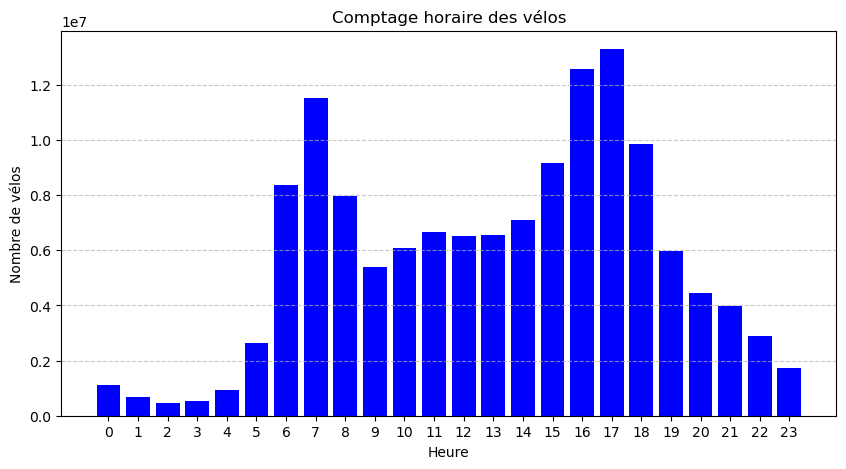


Nous pouvons constater ici que les heures les plus fréquentées sont celles de 7h et 17h
ce qui correspond plus ou moins aux horaires de travail et celles des étudiants.


In [20]:
plt.figure(figsize=(10, 5))
plt.bar(comptage_horaire.index, comptage_horaire.values, color = "blue")
plt.xticks(range(0,24))
plt.xlabel("Heure")
plt.ylabel("Nombre de vélos")
plt.title("Comptage horaire des vélos")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

print('''
Nous pouvons constater ici que les heures les plus fréquentées sont celles de 7h et 17h
ce qui correspond plus ou moins aux horaires de travail et celles des étudiants.''')

In [21]:
df.dtypes

Identifiant du compteur                                    object
Nom du compteur                                            object
Identifiant du site de comptage                           float64
Nom du site de comptage                                    object
Comptage horaire                                            int64
Date et heure de comptage                     datetime64[ns, UTC]
Date d'installation du site de comptage                    object
Lien vers photo du site de comptage                        object
Coordonnées géographiques                                  object
Identifiant technique compteur                             object
ID Photos                                                  object
test_lien_vers_photos_du_site_de_comptage_                 object
id_photo_1                                                 object
url_sites                                                  object
type_dimage                                                object
Année     

In [22]:
comptage_site_de_comptage = df.groupby("Nom du site de comptage")["Comptage horaire"].sum()

In [23]:
print(comptage_site_de_comptage)

Nom du site de comptage
10 avenue de la Grande Armée          291981
10 boulevard Auguste Blanqui          790025
102 boulevard de Magenta             3972646
106 avenue Denfert Rochereau          746009
129 rue Lecourbe                      908225
                                      ...   
Totem 64 Rue de Rivoli               7433711
Totem 73 boulevard de Sébastopol    10321111
Totem 85 quai d'Austerlitz           3743599
Totem Cours la Reine                 2087005
Voie Georges Pompidou                2229440
Name: Comptage horaire, Length: 69, dtype: int64


<Figure size 1200x600 with 0 Axes>

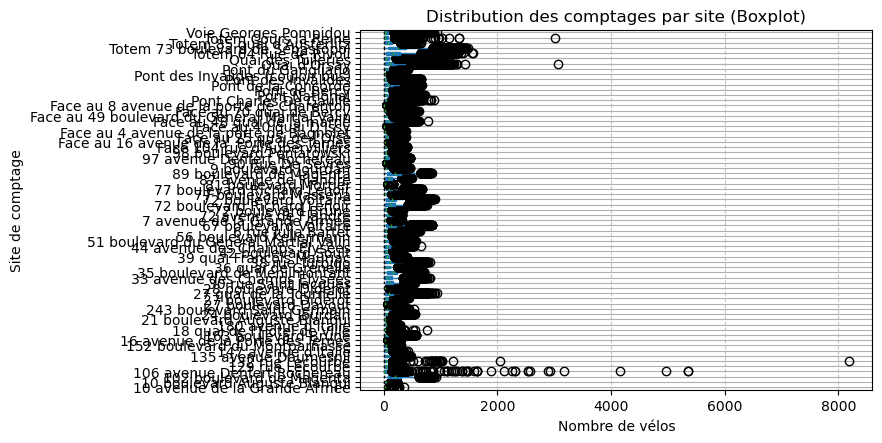

In [24]:
plt.figure(figsize=(12, 6))

# Création du boxplot
df.boxplot(column = "Comptage horaire", by = "Nom du site de comptage", vert = False, patch_artist = True)

plt.xlabel("Nombre de vélos")
plt.ylabel("Site de comptage")
plt.title("Distribution des comptages par site (Boxplot)")
plt.suptitle("")  # Enlève le titre par défaut de Pandas

plt.grid(axis = "x", linestyle = "--", alpha = 0.7)
plt.show()

In [25]:
site_groups = np.array_split(df["Nom du site de comptage"].unique(), 3)

<Figure size 1200x600 with 0 Axes>

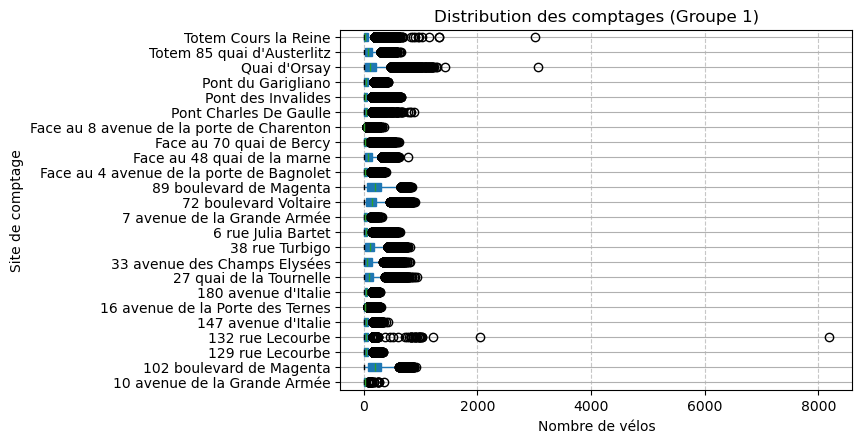

<Figure size 1200x600 with 0 Axes>

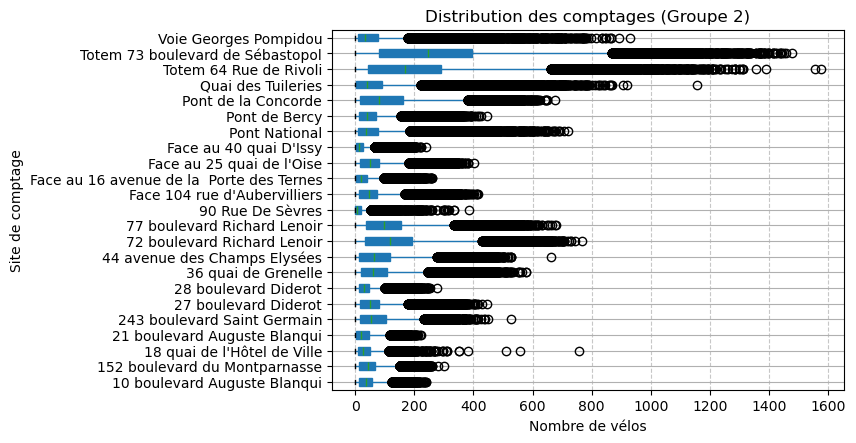

<Figure size 1200x600 with 0 Axes>

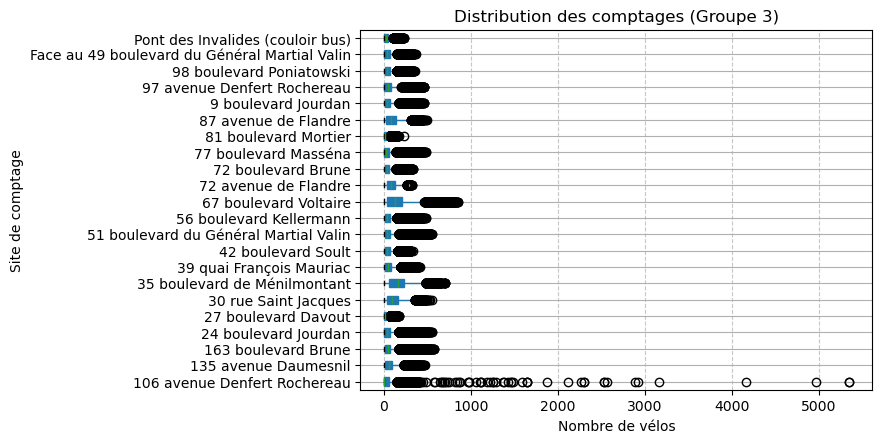


Ces graphiques sont triés des stations les plus fréquentées (groupe 1) aux moins fréquentées (groupe 3).
On peut se rendre compte que beaucoup de stations tendent vers 0 ce qui pourraient montrer un disfonctionnement des compteurs.
Par ailleurs, on remarque des valeurs aberrantes comme environ 1600 au Totem 64 Rue de Rivoli ou un peu plus de 3000 au Quai d'Orsay.
Au Quai d'Orsay, il s'agissait du Dimanche 05 Janvier à 14h avec une météo peu clémente, il n'y a pas vraiment d'explication à ce chiffre élevé.


In [26]:
for i, group in enumerate(site_groups):
    df_subset = df[df["Nom du site de comptage"].isin(group)]
    
    plt.figure(figsize=(12, 6))
    df_subset.boxplot(column="Comptage horaire", by="Nom du site de comptage", vert=False, patch_artist=True)
    
    plt.xlabel("Nombre de vélos")
    plt.ylabel("Site de comptage")
    plt.title(f"Distribution des comptages (Groupe {i+1})")
    plt.suptitle("")  # Enlever le titre par défaut
    
    plt.grid(axis = "x", linestyle = "--", alpha = 0.7)
    plt.show()

print('''
Ces graphiques sont triés des stations les plus fréquentées (groupe 1) aux moins fréquentées (groupe 3).
On peut se rendre compte que beaucoup de stations tendent vers 0 ce qui pourraient montrer un disfonctionnement des compteurs.
Par ailleurs, on remarque des valeurs aberrantes comme environ 1600 au Totem 64 Rue de Rivoli ou un peu plus de 3000 au Quai d'Orsay.
Au Quai d'Orsay, il s'agissait du Dimanche 05 Janvier à 14h avec une météo peu clémente, il n'y a pas vraiment d'explication à ce chiffre élevé.''')

In [27]:
jour_3000 = df[df["Comptage horaire"] > 3000]

In [28]:
print(jour_3000)

       Identifiant du compteur                     Nom du compteur  \
12886      100003098-101003098  106 avenue Denfert Rochereau NE-SO   
667057     100057380-103057380            Totem Cours la Reine O-E   
13398      100003098-101003098  106 avenue Denfert Rochereau NE-SO   
14261      100003098-101003098  106 avenue Denfert Rochereau NE-SO   
14124      100003098-101003098  106 avenue Denfert Rochereau NE-SO   
14315      100003098-101003098  106 avenue Denfert Rochereau NE-SO   
445266     100056044-101056044              132 rue Lecourbe NE-SO   
685401     100056335-103056335                    Quai d'Orsay O-E   

        Identifiant du site de comptage       Nom du site de comptage  \
12886                       100003098.0  106 avenue Denfert Rochereau   
667057                      100057380.0          Totem Cours la Reine   
13398                       100003098.0  106 avenue Denfert Rochereau   
14261                       100003098.0  106 avenue Denfert Rochereau   
1412

In [29]:
df_backup = df.copy()

In [30]:
stations_zero = df[df["Comptage horaire"] == 0]["Nom du site de comptage"].unique()

In [31]:
print(stations_zero)

['Pont National' '97 avenue Denfert Rochereau' 'Face au 70 quai de Bercy'
 "Face au 40 quai D'Issy" '16 avenue de la Porte des Ternes'
 'Pont Charles De Gaulle' 'Face au 16 avenue de la  Porte des Ternes'
 'Quai des Tuileries' '90 Rue De Sèvres' 'Voie Georges Pompidou'
 'Pont des Invalides' 'Face au 4 avenue de la porte de Bagnolet'
 '21 boulevard Auguste Blanqui' 'Face au 48 quai de la marne'
 'Face au 8 avenue de la porte de Charenton' "18 quai de l'Hôtel de Ville"
 '28 boulevard Diderot' '243 boulevard Saint Germain' '6 rue Julia Bartet'
 '7 avenue de la Grande Armée' 'Pont de Bercy'
 '10 boulevard Auguste Blanqui' '129 rue Lecourbe' '132 rue Lecourbe'
 '67 boulevard Voltaire' "Face au 25 quai de l'Oise"
 '39 quai François Mauriac' '27 quai de la Tournelle'
 "Face 104 rue d'Aubervilliers" '38 rue Turbigo' 'Pont de la Concorde'
 'Pont du Garigliano' '36 quai de Grenelle'
 '152 boulevard du Montparnasse' "Quai d'Orsay" '30 rue Saint Jacques'
 '72 boulevard Richard Lenoir' '33 avenue d

In [32]:
df_2024 = df[df["Année"]==2024]

In [33]:
df_2024.loc[:, "Date et heure de comptage"] = df_2024["Date et heure de comptage"].dt.tz_localize(None)

/var/folders/zf/_lqw56895pn79xjzxj5wc0vc0000gn/T/ipykernel_43568/2320146177.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2024-01-01 03:00:00', '2024-01-01 03:00:00', '2024-01-01 03:00:00',
 '2024-01-01 03:00:00', '2024-01-01 03:00:00', '2024-01-01 03:00:00',
 '2024-01-01 03:00:00', '2024-01-01 03:00:00', '2024-01-01 03:00:00',
 '2024-01-01 03:00:00',
 ...
 '2024-12-31 23:00:00', '2024-12-31 23:00:00', '2024-12-31 23:00:00',
 '2024-12-31 23:00:00', '2024-12-31 23:00:00', '2024-12-31 23:00:00',
 '2024-12-31 23:00:00', '2024-12-31 23:00:00', '2024-12-31 23:00:00',
 '2024-12-31 23:00:00']
Length: 846544, dtype: datetime64[ns]' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df_2024.loc[:, "Date et heure de comptage"] = df_2024["Date et heure de comptage"].dt.tz_localize(None)


In [34]:
# Regrouper par mois et sommer les comptages horaires
comptage_mensuel_2024 = df_2024.groupby(df_2024["Date et heure de comptage"].dt.to_period("M"))["Comptage horaire"].sum()

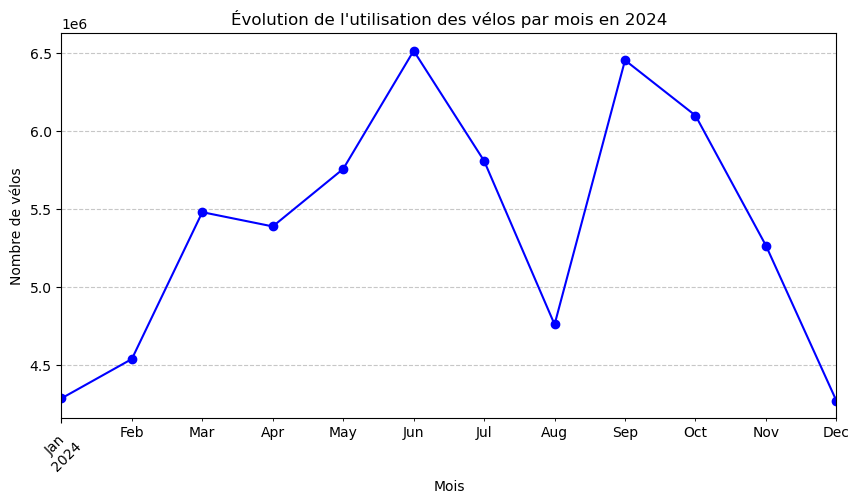

In [35]:
plt.figure(figsize=(10, 5))
comptage_mensuel_2024.plot(kind="line", marker="o", color="blue")

plt.xlabel("Mois")
plt.ylabel("Nombre de vélos")
plt.title("Évolution de l'utilisation des vélos par mois en 2024")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.xticks(rotation=45)  # Rotation des labels pour lisibilité

plt.show()

In [36]:
nombre_station_unique = df["Nom du site de comptage"].nunique()

In [37]:
print(nombre_station_unique)

69


In [38]:
type_image = df["type_dimage"].nunique()

In [39]:
print(type_image)

1


In [40]:
id_photo_1 = df["id_photo_1"].nunique()

In [41]:
print(id_photo_1)

1


In [42]:
perc_val_manq = df.isna().mean()*100
total_perc_val_manq = (df.isna().mean()*100).sum()
print(perc_val_manq)
print("\n", total_perc_val_manq, "%.")

Identifiant du compteur                       3.423405
Nom du compteur                               0.000000
Identifiant du site de comptage               3.423405
Nom du site de comptage                       3.423405
Comptage horaire                              0.000000
Date et heure de comptage                     0.000000
Date d'installation du site de comptage       3.423405
Lien vers photo du site de comptage           4.451010
Coordonnées géographiques                     3.423405
Identifiant technique compteur                4.685461
ID Photos                                     4.451010
test_lien_vers_photos_du_site_de_comptage_    4.451010
id_photo_1                                    4.451010
url_sites                                     3.423405
type_dimage                                   4.451010
Année                                         0.000000
mois_annee_comptage                           0.000000
Jour                                          0.000000
Heure     

In [43]:
###Colonnes à supprimer potentiellement : 
# • Lien vers photo du site de comptage
# • Identifiant technique compteur
# • ID Photos
# • test_lien_vers_photos_du_site_de_comptage
# • id_photo_1
# • url_sites
# • type_dimage